---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Merging Dataframes


In [8]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Cost,Item Purchased,Name
Store 1,22.5,Sponge,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Spoon,Filip


In [9]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

,Cost,Item Purchased,Name,Date
Store 1,22.5,Sponge,Chris,December 1
Store 1,2.5,Kitty Litter,Kevyn,January 1
Store 2,5.0,Spoon,Filip,mid-May


In [10]:
df['Delivered'] = True
df

,Cost,Item Purchased,Name,Date,Delivered
Store 1,22.5,Sponge,Chris,December 1,True
Store 1,2.5,Kitty Litter,Kevyn,January 1,True
Store 2,5.0,Spoon,Filip,mid-May,True


In [11]:
df['Feedback'] = ['Positive', None, 'Negative']
df

,Cost,Item Purchased,Name,Date,Delivered,Feedback
Store 1,22.5,Sponge,Chris,December 1,True,Positive
Store 1,2.5,Kitty Litter,Kevyn,January 1,True,None
Store 2,5.0,Spoon,Filip,mid-May,True,Negative


In [12]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

,index,Cost,Item Purchased,Name,Date,Delivered,Feedback
0,Store 1,22.5,Sponge,Chris,December 1,True,Positive
1,Store 1,2.5,Kitty Litter,Kevyn,NaN,True,None
2,Store 2,5.0,Spoon,Filip,mid-May,True,Negative


In [13]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [14]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [15]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Sally,Course liasion,Engineering


In [16]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [17]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [18]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


In [19]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Location_x,Name,Role,Location_y,School
0,State Street,Kelly,Director of HR,NaN,NaN
1,Washington Avenue,Sally,Course liasion,512 Wilson Crescent,Engineering
2,Washington Avenue,James,Grader,1024 Billiard Avenue,Business


In [20]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


# Idiomatic Pandas: Making Code Pandorable

In [21]:
import pandas as pd
df = pd.read_csv('census.csv')
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [22]:
(df.where(df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})).head()

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                   
Alabama Autauga County    50.0     3.0       6.0    1.0     1.0   
        Baldwin County    50.0     3.0       6.0    1.0     3.0   
        Barbour County    50.0     3.0       6.0    1.0     5.0   
        Bibb County       50.0     3.0       6.0    1.0     7.0   
        Blount County     50.0     3.0       6.0    1.0     9.0   

                        CENSUS2010POP  Estimates Base 2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                               
Alabama Autauga County        54571.0              54571.0          54660.0   
        Baldwin County       182265.0             182265.0         183193.0   
        Barbour County        27457.0              27457.0          27341.0   
        Bibb County           22915.0              22919.0          22861.0   
        Blount County         57322.0              57322.0          57373.0   

                        POPESTIMATE2011  POPESTIMATE2012     ...       \
STNAME  CTYNAME                                              ...        
Alabama Autauga County          55253.0          55175.0     ...        
        Baldwin County         186659.0         190396.0     ...        
        Barbour County          27226.0          27159.0     ...        
        Bibb County             22733.0          22642.0     ...        
        Blount County           57711.0          57776.0     ...        

                        RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  \
STNAME  CTYNAME                                                                
Alabama Autauga County          7.242091         -2.915927         -3.012349   
        Baldwin County         14.832960         17.647293         21.845705   
        Barbour County         -4.728132         -2.500690         -7.056824   
        Bibb County            -5.527043         -5.068871         -6.201001   
        Blount County           1.807375         -1.177622         -1.748766   

                        RDOMESTICMIG2014  RDOMESTICMIG2015  RNETMIG2011  \
STNAME  CTYNAME                                                           
Alabama Autauga County          2.265971         -2.530799     7.606016   
        Baldwin County         19.243287         17.197872    15.844176   
        Barbour County         -3.904217        -10.543299    -4.874741   
        Bibb County            -0.177537          0.177258    -5.088389   
        Blount County          -2.062535         -1.369970     1.859511   

                        RNETMIG2012  RNETMIG2013  RNETMIG2014  RNETMIG2015  
STNAME  CTYNAME                                                             
Alabama Autauga County    -2.626146    -2.722002     2.592270    -2.187333  
        Baldwin County    18.559627    22.727626    20.317142    18.293499  
        Barbour County    -2.758113    -7.167664    -3.978583   -10.543299  
        Bibb County       -4.363636    -5.403729     0.754533     1.107861  
        Blount County     -0.848580    -1.402476    -1.577232    -0.884411  

[5 rows x 98 columns]

In [23]:
df = df[df['SUMLEV']==50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}).head()

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                   
Alabama Autauga County      50       3         6      1       1   
        Baldwin County      50       3         6      1       3   
        Barbour County      50       3         6      1       5   
        Bibb County         50       3         6      1       7   
        Blount County       50       3         6      1       9   

                        CENSUS2010POP  Estimates Base 2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                               
Alabama Autauga County          54571                54571            54660   
        Baldwin County         182265               182265           183193   
        Barbour County          27457                27457            27341   
        Bibb County             22915                22919            22861   
        Blount County           57322                57322            57373   

                        POPESTIMATE2011  POPESTIMATE2012     ...       \
STNAME  CTYNAME                                              ...        
Alabama Autauga County            55253            55175     ...        
        Baldwin County           186659           190396     ...        
        Barbour County            27226            27159     ...        
        Bibb County               22733            22642     ...        
        Blount County             57711            57776     ...        

                        RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  \
STNAME  CTYNAME                                                                
Alabama Autauga County          7.242091         -2.915927         -3.012349   
        Baldwin County         14.832960         17.647293         21.845705   
        Barbour County         -4.728132         -2.500690         -7.056824   
        Bibb County            -5.527043         -5.068871         -6.201001   
        Blount County           1.807375         -1.177622         -1.748766   

                        RDOMESTICMIG2014  RDOMESTICMIG2015  RNETMIG2011  \
STNAME  CTYNAME                                                           
Alabama Autauga County          2.265971         -2.530799     7.606016   
        Baldwin County         19.243287         17.197872    15.844176   
        Barbour County         -3.904217        -10.543299    -4.874741   
        Bibb County            -0.177537          0.177258    -5.088389   
        Blount County          -2.062535         -1.369970     1.859511   

                        RNETMIG2012  RNETMIG2013  RNETMIG2014  RNETMIG2015  
STNAME  CTYNAME                                                             
Alabama Autauga County    -2.626146    -2.722002     2.592270    -2.187333  
        Baldwin County    18.559627    22.727626    20.317142    18.293499  
        Barbour County    -2.758113    -7.167664    -3.978583   -10.543299  
        Bibb County       -4.363636    -5.403729     0.754533     1.107861  
        Blount County     -0.848580    -1.402476    -1.577232    -0.884411  

[5 rows x 98 columns]

In [24]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [25]:
df.apply(min_max, axis=1).head()

max       min
STNAME  CTYNAME                           
Alabama Autauga County   55347.0   54660.0
        Baldwin County  203709.0  183193.0
        Barbour County   27341.0   26489.0
        Bibb County      22861.0   22512.0
        Blount County    57776.0   57373.0

In [26]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis=1).head()

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                   
Alabama Autauga County    50.0     3.0       6.0    1.0     1.0   
        Baldwin County    50.0     3.0       6.0    1.0     3.0   
        Barbour County    50.0     3.0       6.0    1.0     5.0   
        Bibb County       50.0     3.0       6.0    1.0     7.0   
        Blount County     50.0     3.0       6.0    1.0     9.0   

                        CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                             
Alabama Autauga County        54571.0            54571.0          54660.0   
        Baldwin County       182265.0           182265.0         183193.0   
        Barbour County        27457.0            27457.0          27341.0   
        Bibb County           22915.0            22919.0          22861.0   
        Blount County         57322.0            57322.0          57373.0   

                        POPESTIMATE2011  POPESTIMATE2012    ...     \
STNAME  CTYNAME                                             ...      
Alabama Autauga County          55253.0          55175.0    ...      
        Baldwin County         186659.0         190396.0    ...      
        Barbour County          27226.0          27159.0    ...      
        Bibb County             22733.0          22642.0    ...      
        Blount County           57711.0          57776.0    ...      

                        RDOMESTICMIG2013  RDOMESTICMIG2014  RDOMESTICMIG2015  \
STNAME  CTYNAME                                                                
Alabama Autauga County         -3.012349          2.265971         -2.530799   
        Baldwin County         21.845705         19.243287         17.197872   
        Barbour County         -7.056824         -3.904217        -10.543299   
        Bibb County            -6.201001         -0.177537          0.177258   
        Blount County          -1.748766         -2.062535         -1.369970   

                        RNETMIG2011  RNETMIG2012  RNETMIG2013  RNETMIG2014  \
STNAME  CTYNAME                                                              
Alabama Autauga County     7.606016    -2.626146    -2.722002     2.592270   
        Baldwin County    15.844176    18.559627    22.727626    20.317142   
        Barbour County    -4.874741    -2.758113    -7.167664    -3.978583   
        Bibb County       -5.088389    -4.363636    -5.403729     0.754533   
        Blount County      1.859511    -0.848580    -1.402476    -1.577232   

                        RNETMIG2015       max       min  
STNAME  CTYNAME                                          
Alabama Autauga County    -2.187333   55347.0   54660.0  
        Baldwin County    18.293499  203709.0  183193.0  
        Barbour County   -10.543299   27341.0   26489.0  
        Bibb County        1.107861   22861.0   22512.0  
        Blount County     -0.884411   57776.0   57373.0  

[5 rows x 100 columns]

In [27]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis=1).head()

STNAME   CTYNAME       
Alabama  Autauga County     55347.0
         Baldwin County    203709.0
         Barbour County     27341.0
         Bibb County        22861.0
         Blount County      57776.0
dtype: float64

# Group by

In [28]:
import pandas as pd
import numpy as np
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [ ]:
%%timeit -n 10
for state in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
    print('Counties in state ' + state + ' have an average population of ' + str(avg))

In [ ]:
%%timeit -n 10
for group, frame in df.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state ' + group + ' have an average population of ' + str(avg))

In [29]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [30]:
df = df.set_index('STNAME')

def fun(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

for group, frame in df.groupby(fun):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')


There are 1177 records in group 0 for processing.
There are 1134 records in group 1 for processing.
There are 831 records in group 2 for processing.


In [31]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]

In [33]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.average}).head()

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207


In [34]:
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

<class 'pandas.core.groupby.DataFrameGroupBy'>
<class 'pandas.core.groupby.SeriesGroupBy'>


In [35]:
(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP']
    .agg({'avg': np.average, 'sum': np.sum})).head()

,sum,avg
STNAME,,
Alabama,4779736,71339.343284
Alaska,710231,24490.724138
Arizona,6392017,426134.466667
Arkansas,2915918,38878.906667
California,37253956,642309.586207


In [36]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'avg': np.average, 'sum': np.sum})).head()

sum                             avg                
           POPESTIMATE2010 POPESTIMATE2011 POPESTIMATE2010 POPESTIMATE2011
STNAME                                                                    
Alabama            4785161         4801108    71420.313433    71658.328358
Alaska              714021          722720    24621.413793    24921.379310
Arizona            6408208         6468732   427213.866667   431248.800000
Arkansas           2922394         2938538    38965.253333    39180.506667
California        37334079        37700034   643691.017241   650000.586207

In [38]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum})).head()

,POPESTIMATE2010,POPESTIMATE2011
STNAME,,
Alabama,71420.313433,4801108
Alaska,24621.413793,722720
Arizona,427213.866667,6468732
Arkansas,38965.253333,2938538
California,643691.017241,37700034


# Scales

In [44]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [45]:
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [46]:
grades = df['Grades'].astype('category',
                             categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                             ordered=True)
grades.head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [D < D+ < C- < C ... B+ < A- < A < A+]

In [47]:
grades > 'C'

excellent     True
excellent     True
excellent     True
good          True
good          True
good          True
ok            True
ok           False
ok           False
poor         False
poor         False
Name: Grades, dtype: bool

In [53]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'avg': np.average})
pd.cut(df['avg'],10).head()

STNAME
Alabama        (11706.0871, 75333.413]
Alaska         (11706.0871, 75333.413]
Arizona       (390320.176, 453317.529]
Arkansas       (11706.0871, 75333.413]
California    (579312.234, 642309.586]
Name: avg, dtype: category
Categories (10, object): [(11706.0871, 75333.413] < (75333.413, 138330.766] < (138330.766, 201328.118] < (201328.118, 264325.471] ... (390320.176, 453317.529] < (453317.529, 516314.881] < (516314.881, 579312.234] < (579312.234, 642309.586]]

# Pivot Tables

In [54]:
#http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
df = pd.read_csv('cars.csv')

In [55]:
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,n/a,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,n/a,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,n/a,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,n/a,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,n/a,117,7


In [58]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


In [59]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=True)

mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                   amin                                                        \
Make         All    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   
YEAR                                                                            
2012   64.500000    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   
2013  158.444444    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0   
2014  135.000000    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0   
2015  181.428571  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0   
2016  252.263158  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0   
All   190.622642  125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0   

            
Make   All  
YEAR        
2012  49.0  
2013  35.0  
2014  35.0  
2015  35.0  
2016  35.0  
All   35.0

# Date Functionality in Pandas

In [60]:
import pandas as pd
import numpy as np

### Timestamp

In [61]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

### Period

In [62]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [63]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

### DatetimeIndex

In [65]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [66]:
type(t1.index)

pandas.tseries.index.DatetimeIndex

### PeriodIndex

In [67]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [68]:
type(t2.index)

pandas.tseries.period.PeriodIndex

### Converting to Datetime

In [69]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,11,54
"Aug 29, 2014",25,93
2015-06-26,74,15
7/12/16,51,33


In [70]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,11,54
2014-08-29,25,93
2015-06-26,74,15
2016-07-12,51,33


In [71]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

### Timedeltas

In [72]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [73]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

### Working with Dates in a Dataframe

In [74]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [75]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,105,115
2016-10-16,100,123
2016-10-30,99,126
2016-11-13,94,117
2016-11-27,93,127
2016-12-11,98,119
2016-12-25,101,119
2017-01-08,110,120
2017-01-22,118,126


In [76]:
df.index.weekday_name

array(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'], dtype=object)

In [77]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,-5.0,8.0
2016-10-30,-1.0,3.0
2016-11-13,-5.0,-9.0
2016-11-27,-1.0,10.0
2016-12-11,5.0,-8.0
2016-12-25,3.0,0.0
2017-01-08,9.0,1.0
2017-01-22,8.0,6.0


In [80]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,101.333333,121.333333
2016-11-30,93.500000,122.000000
2016-12-31,99.500000,119.000000
2017-01-31,114.000000,123.000000


In [81]:
df['2017']

,Count 1,Count 2
2017-01-08,110,120
2017-01-22,118,126


In [82]:
df['2016-12']

,Count 1,Count 2
2016-12-11,98,119
2016-12-25,101,119


In [83]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,98,119
2016-12-25,101,119
2017-01-08,110,120
2017-01-22,118,126


In [86]:
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,105,115
2016-10-09,105,115
2016-10-16,100,123
2016-10-23,100,123
2016-10-30,99,126
2016-11-06,99,126
2016-11-13,94,117
2016-11-20,94,117
2016-11-27,93,127
2016-12-04,93,127


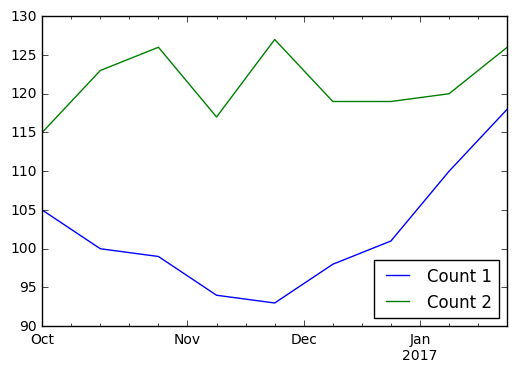

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()